In [163]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_validate, train_test_split
import datetime
from sklearn.neural_network import MLPRegressor
import time
import pytz
from sklearn.preprocessing import StandardScaler



In [ ]:
f_gohawks = "./tweets_#gohawks.txt"
f_gopatriots = "./tweets_#gopatriots.txt"
f_superbowl = "./tweets_#superbowl.txt"
f_nfl = "./tweets_#nfl.txt"
f_patriots = "./tweets_#patriots.txt"
f_sb49 = "./tweets_#sb49.txt"

file_lst = [f_gohawks, f_gopatriots, f_superbowl, f_nfl, f_patriots, f_sb49]

In [ ]:
def read_f(name):
    f_json = []
    with open(name, 'r') as f:
        for l in f:
            f_json.append(json.loads(l))
    return f_json

In [9]:
gohawks = read_f(f_gohawks)
gopatriots = read_f(f_gopatriots)

In [ ]:
superbowl = read_f(f_superbowl)

In [ ]:
nfl = read_f(f_nfl)
patriots = read_f(f_patriots)
sb49 = read_f(f_sb49)

In [ ]:
def report_tweet_statistics(tweets, name):
    followers = []
    retweets = []
    citation_dates = []
    total_tweets = len(tweets)
    for tw in tweets:
        followers.append(tw['author']['followers'])
        retweets.append(tw['metrics']['citations']['total'])
        citation_dates.append(tw['citation_date'])
    max_date = max(citation_dates)
    min_date = min(citation_dates)
    tws_per_hour = total_tweets * 3600 / (max_date - min_date)
    avg_followers = sum(followers) / total_tweets
    avg_retweets = sum(retweets) / total_tweets
    print(name)
    print('average number of tweets per hour: ', tws_per_hour)
    print('average number of followers: ', avg_followers)
    print('average number of retweets: ', avg_retweets)

In [ ]:
report_tweet_statistics(gohawks, "#gohawks")
report_tweet_statistics(gopatriots, "#gopatriots")
report_tweet_statistics(superbowl, "#superbowl")
report_tweet_statistics(nfl, "#nfl")
report_tweet_statistics(patriots, "#patriots")
report_tweet_statistics(sb49, "#sb49")

In [ ]:
import math
citation_dates = [twe['citation_date'] for twe in superbowl]
max_date = max(citation_dates)
min_date = min(citation_dates)
num_c = math.ceil((max_date - min_date)/3600)
n_tweet_hr = [0] * num_c

for t in citation_dates:
    key = math.floor((t- min_date)/3600)
    n_tweet_hr[key] += 1

plt.bar(range(num_c), n_tweet_hr, 1)
# plt.figure(figsize=(12,8))
plt.xlabel('Hours')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets in Hours for Superbowl')
plt.show()

In [ ]:
citation_dates = [twe['citation_date'] for twe in nfl]
max_date = max(citation_dates)
min_date = min(citation_dates)
num_c = math.ceil((max_date - min_date)/3600)
n_tweet_hr = [0] * num_c

for t in citation_dates:
    key = math.floor((t- min_date)/3600)
    n_tweet_hr[key] += 1

plt.bar(range(num_c), n_tweet_hr, 1)
plt.xlabel('Hours')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets in Hours for NFL')
plt.show()

In [11]:
report_tweet(sb49, "#sb49")


Report for  #sb49
 - Average number of tweets per hour:  1276.8570598680474
 - Average number of followers:  10374.160292019487
 - Average number of retweets:  2.52713444111402


In [69]:
# number of tweets in hour for #superbowl
def plot_tws_in_hour(tweets, file_name):
    citation_dates = [tw["citation_date"] for tw in tweets]
    earliest = min(citation_dates)
    counts_per_hour = [0] * (int)((max(citation_dates) - min(citation_dates))/3600.0 + 1)
    for cd in citation_dates:
        counts_per_hour[(int)((cd - earliest) / 3600.0)] += 1
    plt.bar(np.arange(len(counts_per_hour)), counts_per_hour, 1)
    plt.xlabel("Hour Index")
    plt.ylabel("Number of Tweets of " + file_name)
    plt.title("Number of Tweets in Hour for " + file_name)
    plt.show()

In [70]:
tweet_sb49[100]["tweet"].keys()

dict_keys(['contributors', 'truncated', 'text', 'in_reply_to_status_id', 'id', 'favorite_count', 'source', 'retweeted', 'coordinates', 'timestamp_ms', 'entities', 'in_reply_to_screen_name', 'in_reply_to_user_id', 'retweet_count', 'id_str', 'favorited', 'user', 'geo', 'in_reply_to_user_id_str', 'possibly_sensitive', 'lang', 'created_at', 'filter_level', 'in_reply_to_status_id_str', 'place'])

In [71]:
tweet_sb49[53400]['tweet']['entities']

{'symbols': [],
 'user_mentions': [{'indices': [13, 22],
   'id_str': '31126587',
   'screen_name': 'Patriots',
   'name': 'New England Patriots',
   'id': 31126587},
  {'indices': [51, 55],
   'id_str': '19426551',
   'screen_name': 'nfl',
   'name': 'NFL',
   'id': 19426551}],
 'trends': [],
 'hashtags': [{'indices': [31, 36], 'text': 'SB49'},
  {'indices': [38, 50], 'text': 'PatriotsWIN'}],
 'urls': [{'indices': [56, 78],
   'url': 'http://t.co/J2DGcgokGN',
   'expanded_url': 'http://bit.ly/1CfcIQw',
   'display_url': 'bit.ly/1CfcIQw'}]}

In [72]:
tweet_sb49[0].keys()

dict_keys(['firstpost_date', 'title', 'url', 'tweet', 'author', 'original_author', 'citation_date', 'metrics', 'highlight', 'type', 'citation_url'])

In [73]:
link_gohawks = "./tweet_data_pickle/tweet_gohawks.pickle"
link_gopatriots = "./tweet_data_pickle/tweets_gopatriots.pickle"
link_nfl = "./tweet_data_pickle/tweets_nfl.pickle"
link_patriots = "./tweet_data_pickle/tweets_patriots.pickle"
link_sb49 = "./tweet_data_pickle/tweets_sb49.pickle"
link_superbowl = "./tweet_data_pickle/tweets_superbowl.pickle"

In [12]:
tweets = []
impressions = []
usermentions = []
hashtags = []
posttime = []
for i in tweet_sb49:
    tweets.append(i["tweet"]["text"])
    impressions.append(i["metrics"]["impressions"])
    um = i['tweet']['entities']['user_mentions']
    temp_um = []
    for j in um:
        temp_um.append(j["screen_name"])
    usermentions.append(temp_um)
    ht = i['tweet']['entities']['hashtags']
    temp_ht = []
    for j in ht:
        temp_ht.append(j['text'])
    hashtags.append(temp_ht)
    posttime.append(i["citation_date"])

In [14]:
import datetime
import time
import pytz
pst_tz = pytz.timezone('America/Los_Angeles')
import time
from datetime import date

temp_time = []
temp_time.append(time.mktime(datetime.datetime(2015, 2, 2, 0, 12, 35, 0).timetuple()))
temp_time.append(time.mktime(datetime.datetime(2015, 2, 2, 0, 32, 20, 0).timetuple()))
temp_time.append(time.mktime(datetime.datetime(2015, 2, 2, 0, 53, 27, 0).timetuple()))
temp_time.append(time.mktime(datetime.datetime(2015, 2, 2, 0, 58, 28, 0).timetuple()))
temp_time.append(time.mktime(datetime.datetime(2015, 2, 2, 1, 41, 7, 0).timetuple()))
temp_time.append(time.mktime(datetime.datetime(2015, 2, 2, 1, 58, 59, 0).timetuple()))
temp_time.append(time.mktime(datetime.datetime(2015, 2, 2, 2, 27, 47, 0).timetuple()))
temp_time.append(time.mktime(datetime.datetime(2015, 2, 2, 2, 47, 25, 0).timetuple()))

score_time = {
    temp_time[0]: (7, 0),
    temp_time[1]: (7, 7),
    temp_time[2]: (14, 7),
    temp_time[3]: (14, 14),
    temp_time[4]: (14, 17),
    temp_time[5]: (14, 24),
    temp_time[6]: (21, 24),
    temp_time[7]: (28, 24)
}
scorechange_time = list(score_time.keys())


score = []

for i in range(0,len(posttime)):
    if posttime[i] < scorechange_time[0]:
        score.append((0,0))       
    if posttime[i] >= scorechange_time[0] and posttime[i] < scorechange_time[1]:
        score.append(score_time[scorechange_time[0]])
    if posttime[i] >= scorechange_time[1] and posttime[i] < scorechange_time[2]:
        score.append(score_time[scorechange_time[1]])
    if posttime[i] >= scorechange_time[2] and posttime[i] < scorechange_time[3]:
        score.append(score_time[scorechange_time[2]])
    if posttime[i] >= scorechange_time[3] and posttime[i] < scorechange_time[4]:
        score.append(score_time[scorechange_time[3]])
    if posttime[i] >= scorechange_time[4] and posttime[i] < scorechange_time[5]:
        score.append(score_time[scorechange_time[4]])
    if posttime[i] >= scorechange_time[5] and posttime[i] < scorechange_time[6]:
        score.append(score_time[scorechange_time[5]])
    if posttime[i] >= scorechange_time[6] and posttime[i] < scorechange_time[7]:
        score.append(score_time[scorechange_time[6]])
    if posttime[i] >= scorechange_time[7]:
        score.append(score_time[scorechange_time[7]])
    
    

In [15]:
df = pd.DataFrame(list(zip(tweets, impressions, usermentions, hashtags, posttime)),
               columns =['tweets', 'impressions', 'usermentions', 'hashtags', 'time'])

In [16]:
patriots = ["patriots", "patriotsnation", "gopatriots" "tombrady", "newenglandpatriots", "goat", "foreverne","gostkowski", "blafell1", "robgronkowski", "dannyamendola", "edelman11", "patriotsbeat"]
patriots_str = " ".join(patriots)
hawks = ["seahawks", "gohawks", "seattle", "eagles", "wilson", "moneylynch", "stephenHauschka", "hardballchris", "dangerusswilson", "dougbaldwinjr"]
hawks_str = " ".join(hawks)

In [17]:
def pcount(lst):
    count = 0
    for i in lst:
        if i.lower() in patriots_str:
            count += 1
    return count
def hcount(lst):
    count = 0
    for i in lst:
        if i.lower() in hawks_str:
            count += 1
    return count

In [18]:
df['npatriots_ht'] = df['hashtags'].apply(lambda x: pcount(x))
df['nhawks_ht'] = df['hashtags'].apply(lambda x: hcount(x))
df['npatriots_m'] = df['usermentions'].apply(lambda x: pcount(x))
df['nhawks_m'] = df['usermentions'].apply(lambda x: hcount(x))
df["score"] = score

In [19]:
df["t"] = df["time"].apply(lambda x: str(pd.Timestamp(x, unit='s'))[:-2] + "00")

In [21]:
tag_search = list(set([a for b in df.hashtags.tolist() for a in b]))

import re
hawk_tags = []
patriot_tags = []
for t in tag_search:
    if re.search('hawk', t, re.IGNORECASE):
        hawk_tags.append(t)
    elif re.search('patriot', t, re.IGNORECASE):
        patriot_tags.append(t)

hawk_tags = list(set(hawk_tags + hawks))
patriot_tags = list(set(patriot_tags + patriots))
len(hawk_tags), len(patriot_tags)

(819, 473)

In [22]:
def classify_team(lst):
    s1 = set(lst)
    s2 = set(hawk_tags)
    s3 = set(patriot_tags)
    # does not tag a specific team or tag an equal number of times -> both
    if not s1 & s2 and not s1 & s3:
        return 'both'
    if len(s1 & s2) > len(s1 & s3):
        return 'hawks'
    elif len(s1 & s2) < len(s1 & s3):
        return 'patriot'
    else:
        return 'both'

df['team'] = df['hashtags'].apply(classify_team)
df.team.value_counts()

both       329633
hawks      230670
patriot    183346
Name: team, dtype: int64

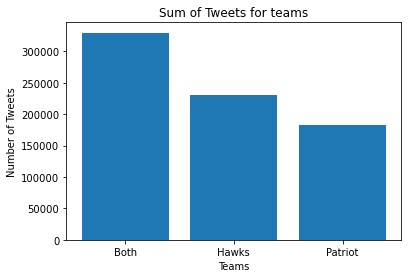

In [23]:
x = ['Both', 'Hawks', 'Patriot']
y = [329633, 230670,183346]
fig = plt.figure(figsize=(6,4)) 
plt.bar(x,y)
plt.xlabel('Teams')
plt.ylabel('Number of Tweets')
plt.title('Sum of Tweets for teams')
plt.show()

In [25]:
df

,tweets,impressions,usermentions,hashtags,time,npatriots_ht,nhawks_ht,npatriots_m,nhawks_m,score,t,team
0,I'd take a day off on Feb 2 if the #Patriots a...,69,[],"[Patriots, Seahawks, SuperBowl, NFL, SB49]",1421238675,1,1,0,0,"(0, 0)",2015-01-14 12:31:00,both
1,Looking for blog post ideas for the Superbowl?...,21,"[AZSuperBowl, SuperBowl]","[SB49, AZSuperBowl, blogpostideas]",1421244058,0,0,0,0,"(0, 0)",2015-01-14 14:00:00,both
2,I wore my @PatMcAfeeShow shirt and my new Colt...,53,[PatMcAfeeShow],"[GoColts, BoomStick, SB49, Lombardi]",1421246898,0,0,0,0,"(0, 0)",2015-01-14 14:48:00,both
3,"""@Duracell: Play #Madden15 vs real NFL players...",545,"[Duracell, GregxRuiz]","[Madden15, SB49]",1421249217,0,0,0,0,"(0, 0)",2015-01-14 15:26:00,both
4,“@Duracell: Play #Madden15 vs real NFL players...,254,"[Duracell, CMStud]","[Madden15, SB49, Duracell26hrs]",1421249288,0,0,0,0,"(0, 0)",2015-01-14 15:28:00,both
...,...,...,...,...,...,...,...,...,...,...,...,...
743644,Media coverage by @12News of Last week's #SB49...,154,"[12News, JGroupMedia]","[SB49, jenublasi, trunkclub, Fanfest]",1423335031,0,0,0,0,"(28, 24)",2015-02-07 18:50:00,both
743645,@PatriotsBeat Incredible fan's eye view of #SB...,495,[PatriotsBeat],"[SB49, Patriots, Seahawks, PatriotsNation]",1423335300,2,1,1,0,"(28, 24)",2015-02-07 18:55:00,patriot
743646,Huge touchdown by our guy @dannyamendola Don’t...,34,[DannyAmendola],"[SB49, NFLMobile]",1423335301,0,0,1,0,"(28, 24)",2015-02-07 18:55:00,both
743647,That’s 7 for the @Seahawks! Does this change y...,34,[Seahawks],"[WhosGonnaWin, SB49]",1423335329,0,0,0,1,"(28, 24)",2015-02-07 18:55:00,both


In [109]:
# select competition time
start_time = int(time.mktime(datetime.datetime(2015, 2, 1, 23, 30, 0, 0).timetuple()))
end_time = int(time.mktime(datetime.datetime(2015, 2, 2, 2, 50, 25, 0).timetuple()))

df1 = df[df["time"] >= start_time]
df1 = df[df["time"] <= end_time]

tweet_time1 = df1.groupby(['score'])
tweet_time = tweet_time1.count()
tweet_time




,tweets,impressions,usermentions,hashtags,time,npatriots_ht,nhawks_ht,npatriots_m,nhawks_m,t,team
score,,,,,,,,,,,
"(0, 0)",702476,702476,702476,702476,702476,702476,702476,702476,702476,702476,702476
"(7, 0)",411,411,411,411,411,411,411,411,411,411,411
"(7, 7)",382,382,382,382,382,382,382,382,382,382,382
"(14, 7)",74,74,74,74,74,74,74,74,74,74,74
"(14, 14)",665,665,665,665,665,665,665,665,665,665,665
"(14, 17)",236,236,236,236,236,236,236,236,236,236,236
"(14, 24)",402,402,402,402,402,402,402,402,402,402,402
"(21, 24)",284,284,284,284,284,284,284,284,284,284,284
"(28, 24)",48,48,48,48,48,48,48,48,48,48,48


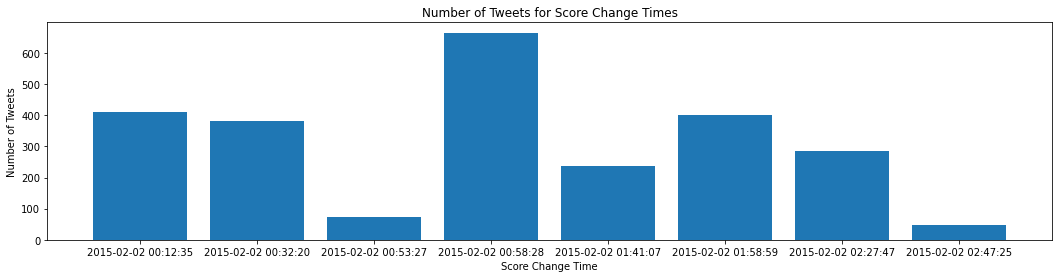

In [45]:
fig = plt.figure(figsize=(18,4))
y = tweet_time['tweets'][1:]
x = ['2015-02-02 00:12:35','2015-02-02 00:32:20','2015-02-02 00:53:27','2015-02-02 00:58:28','2015-02-02 01:41:07','2015-02-02 01:58:59','2015-02-02 02:27:47', '2015-02-02 02:47:25']

plt.bar(x,y)
plt.xlabel('Score Change Time')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets for Score Change Times')
plt.show()

In [62]:
team_tweet = df1.groupby(['team'])
# fig = plt.figure(figsize=(18,4))
# y = tweet_time['tweets'][1:]
# x = ['2015-02-02 00:12:35','2015-02-02 00:32:20','2015-02-02 00:53:27','2015-02-02 00:58:28','2015-02-02 01:41:07','2015-02-02 01:58:59','2015-02-02 02:27:47', '2015-02-02 02:47:25']
y = team_tweet.count()
y1 = team_tweet['score']
y1
# plt.plot(x,y)
# plt.xlabel('Score Change Time')
# plt.ylabel('Number of Tweets')
# plt.title('Number of Tweets for Score Change Times')
# plt.show()

In [135]:
### Draw plot for tweets of different teams in different score change times
df2 = df1[df1["time"] >= scorechange_time[0]]
df2 = df2[df2["time"] <= scorechange_time[1]]
y1 = df2.groupby(['team'])
y = y1.count()
y
both =[]
p = []
h = []
both.append(y['score'][0])
p.append(y['score'][2])
h.append(y['score'][1])
df3 = df1[df1["time"] >= scorechange_time[1]]
df3 = df3[df3["time"] < scorechange_time[2]]
y3 = df3.groupby(['team'])
y31 = y3.count()
both.append(y31['score'][0])
p.append(y31['score'][2])
h.append(y31['score'][1])
df4 = df1[df1["time"] >= scorechange_time[2]]
df4 = df4[df4["time"] < scorechange_time[3]]
y4 = df4.groupby(['team'])
y41 = y4.count()
y41
both.append(y41['score'][0])
p.append(y41['score'][1])
h.append(0)

df5 = df1[df1["time"] >= scorechange_time[2]]
df5 = df5[df5["time"] < scorechange_time[3]]
y5 = df5.groupby(['team'])
y51 = y5.count()
y51
both.append(y51['score'][0])
p.append(y51['score'][1])
h.append(0)

df6 = df1[df1["time"] >= scorechange_time[3]]
df6 = df6[df6["time"] < scorechange_time[4]]
y6 = df6.groupby(['team'])
y61 = y6.count()
y61
both.append(y61['score'][0])
p.append(y61['score'][2])
h.append(y61['score'][1])

df7 = df1[df1["time"] >= scorechange_time[4]]
df7 = df7[df7["time"] < scorechange_time[5]]
y7 = df7.groupby(['team'])
y71 = y7.count()
y71
both.append(y71['score'][0])
p.append(y71['score'][2])
h.append(y71['score'][1])

df8 = df1[df1["time"] >= scorechange_time[5]]
df8 = df8[df8["time"] < scorechange_time[6]]
y8 = df8.groupby(['team'])
y81 = y8.count()
y81
both.append(y81['score'][0])
p.append(y81['score'][2])
h.append(y81['score'][1])

df9 = df1[df1["time"] >= scorechange_time[6]]
df9 = df9[df9["time"] < scorechange_time[7]]
y9 = df9.groupby(['team'])
y91 = y9.count()
y91
both.append(y91['score'][0])
p.append(y91['score'][2])
h.append(y91['score'][1])
both

[337, 312, 65, 65, 555, 195, 323, 237]

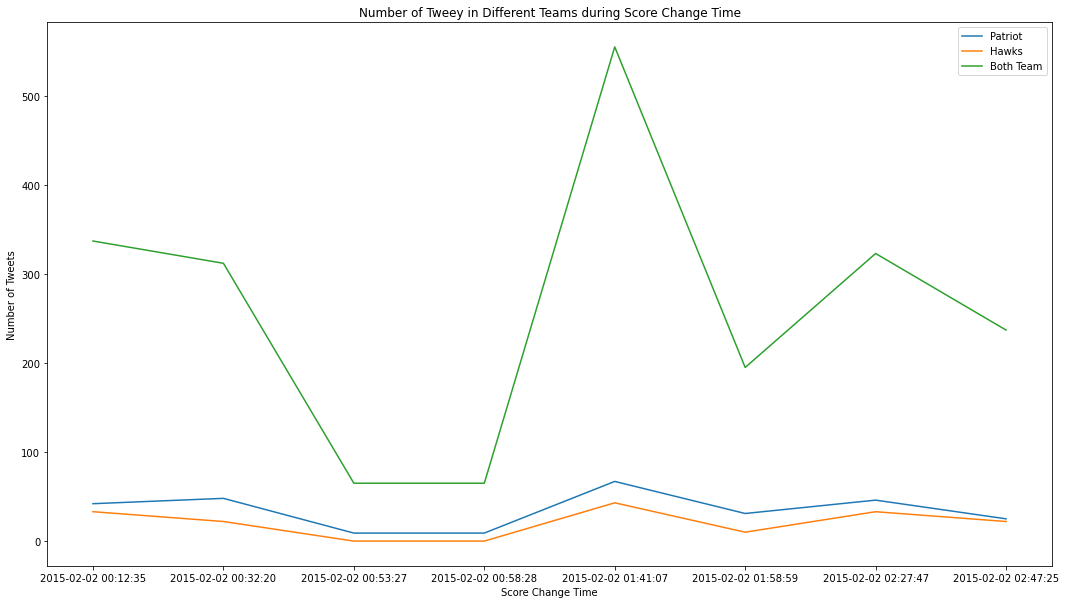

In [137]:
fig, axs = plt.subplots(figsize=(18, 10))
axs.plot(x, p, label = 'Patriot')
axs.plot(x, h, label = 'Hawks')
axs.plot(x, both, label = 'Both Team')
axs.set_title("Number of Tweey in Different Teams during Score Change Time")
axs.set_xlabel("Score Change Time")
axs.set_ylabel("Number of Tweets")
axs.legend()
plt.show()

In [138]:
# from nltk.corpus import stopwords
def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    # temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

# https://catriscode.com/2021/05/01/tweets-cleaning-with-python/

In [139]:
df['cleaned_tweets'] = df.tweets.apply(clean_tweet)
df.cleaned_tweets[0]

<ipython-input-138-d2b4b1d7a50b>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


'id take a day off on feb 2 if the and or the advance to the'

In [140]:
# use textblob
# https://towardsdatascience.com/the-most-favorable-pre-trained-sentiment-classifiers-in-python-9107c06442c6
from textblob import TextBlob
df['sentiment'] = df['tweets'].apply(lambda text: TextBlob(text).sentiment.polarity)

In [141]:
df["score_p"] = df['score'].apply(lambda x: x[0])
df["score_h"] = df['score'].apply(lambda x: x[1])

In [142]:
df

,tweets,impressions,usermentions,hashtags,time,npatriots_ht,nhawks_ht,npatriots_m,nhawks_m,score,t,team,cleaned_tweets,sentiment,score_p,score_h
0,I'd take a day off on Feb 2 if the #Patriots a...,69,[],"[Patriots, Seahawks, SuperBowl, NFL, SB49]",1421238675,1,1,0,0,"(0, 0)",2015-01-14 12:31:00,both,id take a day off on feb 2 if the and or the a...,0.000000,0,0
1,Looking for blog post ideas for the Superbowl?...,21,"[AZSuperBowl, SuperBowl]","[SB49, AZSuperBowl, blogpostideas]",1421244058,0,0,0,0,"(0, 0)",2015-01-14 14:00:00,both,looking for blog post ideas for the superbowl,0.000000,0,0
2,I wore my @PatMcAfeeShow shirt and my new Colt...,53,[PatMcAfeeShow],"[GoColts, BoomStick, SB49, Lombardi]",1421246898,0,0,0,0,"(0, 0)",2015-01-14 14:48:00,both,i wore my shirt and my new colts warmup last s...,0.045455,0,0
3,"""@Duracell: Play #Madden15 vs real NFL players...",545,"[Duracell, GregxRuiz]","[Madden15, SB49]",1421249217,0,0,0,0,"(0, 0)",2015-01-14 15:26:00,both,play vs real nfl players for a chance to win t...,0.500000,0,0
4,“@Duracell: Play #Madden15 vs real NFL players...,254,"[Duracell, CMStud]","[Madden15, SB49, Duracell26hrs]",1421249288,0,0,0,0,"(0, 0)",2015-01-14 15:28:00,both,play vs real nfl players for a chance to win t...,0.500000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743644,Media coverage by @12News of Last week's #SB49...,154,"[12News, JGroupMedia]","[SB49, jenublasi, trunkclub, Fanfest]",1423335031,0,0,0,0,"(28, 24)",2015-02-07 18:50:00,both,media coverage by of last weeks s host styled ...,0.000000,28,24
743645,@PatriotsBeat Incredible fan's eye view of #SB...,495,[PatriotsBeat],"[SB49, Patriots, Seahawks, PatriotsNation]",1423335300,2,1,1,0,"(28, 24)",2015-02-07 18:55:00,patriot,incredible fans eye view of beat the everyone ...,0.900000,28,24
743646,Huge touchdown by our guy @dannyamendola Don’t...,34,[DannyAmendola],"[SB49, NFLMobile]",1423335301,0,0,1,0,"(28, 24)",2015-02-07 18:55:00,both,huge touchdown by our guy don t miss him make ...,0.200000,28,24
743647,That’s 7 for the @Seahawks! Does this change y...,34,[Seahawks],"[WhosGonnaWin, SB49]",1423335329,0,0,0,1,"(28, 24)",2015-02-07 18:55:00,both,that s 7 for the does this change your pick,0.000000,28,24


In [143]:

data = pd.DataFrame(df.groupby(['time'])['sentiment'].mean())
data['count'] = pd.DataFrame(df.groupby([ 'time'])['tweets'].count())
data['timestamp'] = pd.DataFrame(df.groupby([ 'time'])['time'].max())
data["npatriots_ht"] = pd.DataFrame(df.groupby(['time'])['npatriots_ht'].sum())
data["nhawks_ht"] = pd.DataFrame(df.groupby(['time'])['nhawks_ht'].sum())
data["npatriots_m"] = pd.DataFrame(df.groupby(['time'])['npatriots_m'].sum())
data["nhawks_m"] = pd.DataFrame(df.groupby(['time'])['nhawks_m'].sum())
data["score_diff"] = pd.DataFrame(df.groupby(['time'])['score'].max())
data["score_p"] = pd.DataFrame(df.groupby([ 'time'])['score_p'].max())
data["score_h"] = pd.DataFrame(df.groupby(['time'])['score_h'].max())
data["score_diff"] = data.score_p - data.score_h
data = data.reset_index()
data

,time,sentiment,count,timestamp,npatriots_ht,nhawks_ht,npatriots_m,nhawks_m,score_diff,score_p,score_h
0,1421238675,0.000000,1,1421238675,1,1,0,0,0,0,0
1,1421244058,0.000000,1,1421244058,0,0,0,0,0,0,0
2,1421246898,0.045455,1,1421246898,0,0,0,0,0,0,0
3,1421249217,0.500000,1,1421249217,0,0,0,0,0,0,0
4,1421249288,0.500000,1,1421249288,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
117774,1423335031,0.000000,1,1423335031,0,0,0,0,4,28,24
117775,1423335300,0.900000,1,1423335300,2,1,1,0,4,28,24
117776,1423335301,0.200000,1,1423335301,0,0,1,0,4,28,24
117777,1423335329,0.000000,1,1423335329,0,0,0,1,4,28,24


In [144]:
data

,time,sentiment,count,timestamp,npatriots_ht,nhawks_ht,npatriots_m,nhawks_m,score_diff,score_p,score_h
0,1421238675,0.000000,1,1421238675,1,1,0,0,0,0,0
1,1421244058,0.000000,1,1421244058,0,0,0,0,0,0,0
2,1421246898,0.045455,1,1421246898,0,0,0,0,0,0,0
3,1421249217,0.500000,1,1421249217,0,0,0,0,0,0,0
4,1421249288,0.500000,1,1421249288,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
117774,1423335031,0.000000,1,1423335031,0,0,0,0,4,28,24
117775,1423335300,0.900000,1,1423335300,2,1,1,0,4,28,24
117776,1423335301,0.200000,1,1423335301,0,0,1,0,4,28,24
117777,1423335329,0.000000,1,1423335329,0,0,0,1,4,28,24


In [150]:
# Standardize
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
# select competition time
start_time = int(time.mktime(datetime.datetime(2015, 2, 1, 23, 30, 0, 0).timetuple()))
end_time = int(time.mktime(datetime.datetime(2015, 2, 2, 2, 50, 25, 0).timetuple()))

data = data[data["timestamp"] >= start_time]
data = data[data["timestamp"] <= end_time]

data

,time,sentiment,count,timestamp,npatriots_ht,nhawks_ht,npatriots_m,nhawks_m,score_diff,score_p,score_h
82015,1422862200,0.000000,1,1422862200,0,0,0,0,0,0,0
82016,1422862201,0.600000,1,1422862201,0,0,0,0,0,0,0
82017,1422862208,0.066667,3,1422862208,0,1,0,0,0,0,0
82018,1422862209,0.000000,1,1422862209,0,0,0,0,0,0,0
82019,1422862211,0.000000,1,1422862211,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
85032,1422874212,0.000000,1,1422874212,1,0,0,0,4,28,24
85033,1422874217,0.000000,1,1422874217,0,0,0,0,4,28,24
85034,1422874218,0.000000,1,1422874218,0,0,0,0,4,28,24
85035,1422874219,0.000000,1,1422874219,0,0,0,0,4,28,24


Text(0.5, 1.0, 'Heatmap-score difference')

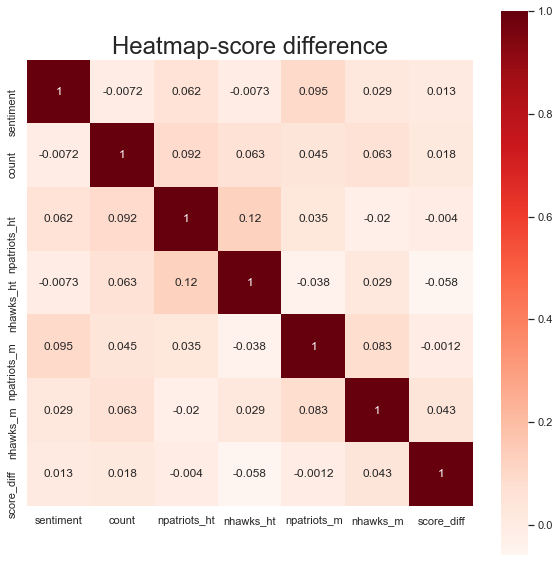

In [159]:
import seaborn as sns
data1 = data[['sentiment','count','npatriots_ht','nhawks_ht','npatriots_m','nhawks_m','score_diff']]
corr1 = data1.corr()
sns.set(rc = {'figure.figsize':(10,10)})
ax = sns.heatmap(corr1, square=True, cmap="Reds", annot = True)
ax.set_title( "Heatmap-score difference" , size = 24 )

Text(0.5, 1.0, 'Heatmap-score patriots')

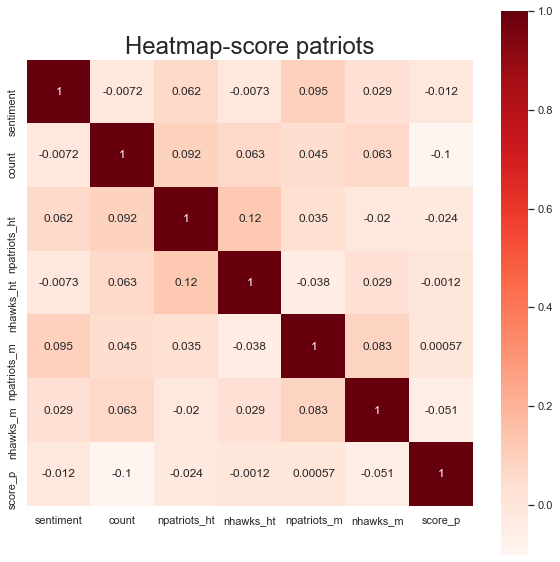

In [161]:
data2 = data[['sentiment','count','npatriots_ht','nhawks_ht','npatriots_m','nhawks_m','score_p']]
corr2 = data2.corr()
sns.set(rc = {'figure.figsize':(10,10)})
ax = sns.heatmap(corr2, square=True, cmap="Reds", annot = True)
ax.set_title( "Heatmap-score patriots" , size = 24 )

Text(0.5, 1.0, 'Heatmap-score hawks')

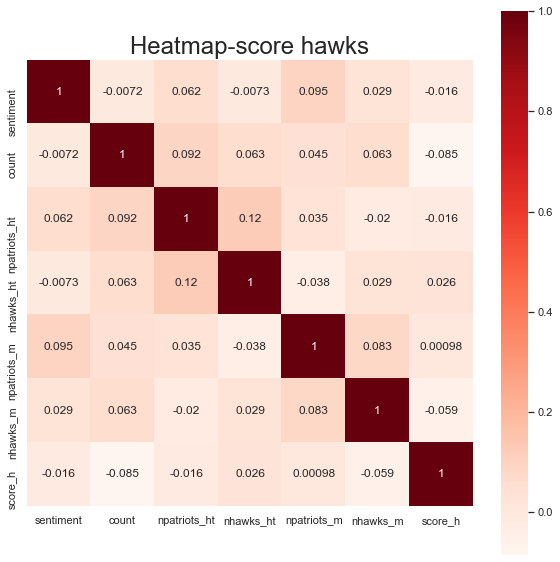

In [162]:
data3 = data[['sentiment','count','npatriots_ht','nhawks_ht','npatriots_m','nhawks_m','score_h']]
corr3 = data3.corr()
sns.set(rc = {'figure.figsize':(10,10)})
ax = sns.heatmap(corr3, square=True, cmap="Reds", annot = True)
ax.set_title( "Heatmap-score hawks" , size = 24 )